In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings("ignore")

In [30]:
df = pd. read_pickle('../input/dataset/Dataset.pkl') 

In [31]:
df

{'LabAnalysis':     %Time  irr_PH  irr_EC  irr_NH4  irr_K  irr_Na  irr_Ca  irr_Mg  irr_Si  \
 0   43836     5.3     4.3     1.10   15.2     0.3     9.6     4.9   0.090   
 1   43850     5.2     4.0     1.10   11.3     0.3     9.8     4.1   0.090   
 2   43864     4.8     3.9     1.30   11.6     0.3    10.2     3.5   0.090   
 3   43879     4.8     3.7     1.40   13.3     0.4     8.2     2.8   0.090   
 4   43893     4.7     3.5     1.10   11.3     0.4     7.6     2.5   0.010   
 5   43908     5.4     3.4     1.30   13.4     0.3     6.5     1.9   0.009   
 6   43921     5.6     3.1     1.20   11.0     0.2     5.6     2.0   0.009   
 7   43936     5.7     2.9     1.20    9.3     0.3     6.4     2.7   0.009   
 8   43951     6.0     3.6     0.80   13.6     0.3     8.3     3.2   0.010   
 9   43963     5.7     3.0     0.80    9.1     0.2     6.2     2.1   0.010   
 10  43836     4.3     5.1     1.10   15.1     0.3     9.7     5.0   0.090   
 11  43850     5.6     4.0     0.50   17.1     0.

In [32]:
with open('../input/dataset/Dataset.pkl', 'rb') as f:
    data = pickle.load(f)

In [33]:
data.keys()

dict_keys(['LabAnalysis', 'Resources', 'TomQuality', 'Production', 'CropParameters', 'GrodanSens', 'GreenhouseClimate'])

Exploratory Data Analysis on TomQuality Dataset

In [34]:
tom_df=data['TomQuality']
tom_df.shape

(48, 14)

In [35]:
tom_df.head(10)

,%time,Flavour,TSS,Acid,%Juice,Bite,Weight,DMC_fruit,\tFlavour,\tTSS,\tAcid,\t%Juice,\tBite,\tWeight\tDMC_fruit
0,43880,77.0,8.0,14.5,66.0,179.0,8.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,43894,77.0,8.6,14.5,63.0,274.0,8.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,43908,73.0,8.4,14.0,56.0,315.0,10.00,8.19,NaN,NaN,NaN,NaN,NaN,NaN
3,43922,79.0,9.2,14.4,60.0,382.0,9.10,9.31,NaN,NaN,NaN,NaN,NaN,NaN
4,43936,80.0,9.3,14.5,61.0,288.0,8.50,9.46,NaN,NaN,NaN,NaN,NaN,NaN
5,43950,77.0,9.0,13.0,61.0,300.0,9.90,8.75,NaN,NaN,NaN,NaN,NaN,NaN
6,43964,82.0,9.6,13.2,66.0,238.0,9.97,8.87,NaN,NaN,NaN,NaN,NaN,NaN
7,43980,72.0,8.2,11.8,64.0,201.0,11.60,9.33,NaN,NaN,NaN,NaN,NaN,NaN
8,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.9,15.0,58.0,187.0,7.77,\tnan
9,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.9,14.4,63.0,217.0,8.90,\tnan


In [36]:
tom_df.rename(columns = {'%time':'Time',}, inplace = True)

In [37]:
tom_df["Time"]= pd.to_datetime(tom_df["Time"])

In [38]:
tom_df.info

<bound method DataFrame.info of                             Time  Flavour    TSS  Acid  %Juice   Bite  Weight  \
0  1970-01-01 00:00:00.000043880      77.0  8.00  14.5    66.0  179.0    8.97   
1  1970-01-01 00:00:00.000043894      77.0  8.60  14.5    63.0  274.0    8.80   
2  1970-01-01 00:00:00.000043908      73.0  8.40  14.0    56.0  315.0   10.00   
3  1970-01-01 00:00:00.000043922      79.0  9.20  14.4    60.0  382.0    9.10   
4  1970-01-01 00:00:00.000043936      80.0  9.30  14.5    61.0  288.0    8.50   
5  1970-01-01 00:00:00.000043950      77.0  9.00  13.0    61.0  300.0    9.90   
6  1970-01-01 00:00:00.000043964      82.0  9.60  13.2    66.0  238.0    9.97   
7  1970-01-01 00:00:00.000043980      72.0  8.20  11.8    64.0  201.0   11.60   
8  1970-01-01 00:00:00.000000074       NaN   NaN   NaN     NaN    NaN     NaN   
9  1970-01-01 00:00:00.000000073       NaN   NaN   NaN     NaN    NaN     NaN   
10 1970-01-01 00:00:00.000000076       NaN   NaN   NaN     NaN    NaN     NaN

In [39]:
tom_df.describe()

,Flavour,TSS,Acid,%Juice,Bite,Weight,\tFlavour,\tTSS,\tAcid,\t%Juice,\tBite
count,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,76.60000,8.681500,13.285000,61.100000,242.725000,10.263500,8.462500,12.912500,60.500000,213.750000,10.308750
std,4.49387,0.565597,1.466471,4.754485,61.427041,1.624758,0.492624,2.014545,3.741657,36.612839,2.563705
min,65.00000,7.300000,9.000000,50.000000,139.000000,8.500000,7.900000,10.700000,55.000000,166.000000,7.470000
25%,74.00000,8.300000,12.575000,57.750000,189.500000,9.100000,8.050000,10.975000,58.000000,186.500000,8.617500
50%,77.00000,8.650000,13.600000,61.500000,241.000000,9.935000,8.450000,12.750000,60.500000,215.500000,9.600000
75%,79.00000,9.000000,14.425000,64.000000,288.500000,10.902500,8.775000,14.550000,62.250000,223.750000,11.775000
max,88.00000,9.900000,15.200000,69.000000,382.000000,16.800000,9.200000,15.800000,67.000000,284.000000,14.630000


In [40]:
tom_df.columns

Index(['Time', 'Flavour ', 'TSS', 'Acid', '%Juice', 'Bite', 'Weight',
       'DMC_fruit', '\tFlavour', ' \tTSS', '\tAcid', '\t%Juice', '\tBite',
       '\tWeight\tDMC_fruit'],
      dtype='object')

In [41]:
tom_df.dtypes

Time                   datetime64[ns]
Flavour                       float64
TSS                           float64
Acid                          float64
%Juice                        float64
Bite                          float64
Weight                        float64
DMC_fruit                      object
\tFlavour                     float64
 \tTSS                        float64
\tAcid                        float64
\t%Juice                      float64
\tBite                        float64
\tWeight\tDMC_fruit            object
dtype: object

In [42]:
res_tom=list(tom_df.columns.values)
res_tom.remove('Time')

In [43]:
tom_df.nunique()

Time                   14
Flavour                17
TSS                    20
Acid                   24
%Juice                 17
Bite                   38
Weight                 29
DMC_fruit              29
\tFlavour               7
 \tTSS                  8
\tAcid                  6
\t%Juice                8
\tBite                  8
\tWeight\tDMC_fruit     7
dtype: int64

In [44]:
tom_df.duplicated().sum()

0

In [45]:
tom_df.isnull().sum()

Time                    0
Flavour                 8
TSS                     8
Acid                    8
%Juice                  8
Bite                    8
Weight                  8
DMC_fruit              17
\tFlavour              40
 \tTSS                 40
\tAcid                 40
\t%Juice               40
\tBite                 40
\tWeight\tDMC_fruit    40
dtype: int64

In [46]:
tom_df.replace(np.nan,'0',inplace = True)

In [47]:
tom_df.isnull().sum()

Time                   0
Flavour                0
TSS                    0
Acid                   0
%Juice                 0
Bite                   0
Weight                 0
DMC_fruit              0
\tFlavour              0
 \tTSS                 0
\tAcid                 0
\t%Juice               0
\tBite                 0
\tWeight\tDMC_fruit    0
dtype: int64

In [48]:
tom_df.columns

Index(['Time', 'Flavour ', 'TSS', 'Acid', '%Juice', 'Bite', 'Weight',
       'DMC_fruit', '\tFlavour', ' \tTSS', '\tAcid', '\t%Juice', '\tBite',
       '\tWeight\tDMC_fruit'],
      dtype='object')

In [49]:
tom_df.dtypes

Time                   datetime64[ns]
Flavour                        object
TSS                            object
Acid                           object
%Juice                         object
Bite                           object
Weight                         object
DMC_fruit                      object
\tFlavour                      object
 \tTSS                         object
\tAcid                         object
\t%Juice                       object
\tBite                         object
\tWeight\tDMC_fruit            object
dtype: object

In [50]:
for i in res_tom:
    tom_df[i] = tom_df[i].astype(float)

In [51]:
corelation=tom_df.corr()
corelation

,Flavour,TSS,Acid,%Juice,Bite,Weight,DMC_fruit,\tFlavour,\tTSS,\tAcid,\t%Juice,\tBite,\tWeight\tDMC_fruit
Flavour,1.000000,0.996312,0.970586,0.987487,0.828373,0.900165,0.590002,-0.988326,-0.977668,-0.988100,-0.975175,-0.959420,-0.985609
TSS,0.996312,1.000000,0.968642,0.975814,0.854459,0.897760,0.631486,-0.986059,-0.975425,-0.985834,-0.972939,-0.957219,-0.982739
Acid,0.970586,0.968642,1.000000,0.946691,0.882496,0.823207,0.504830,-0.964444,-0.954043,-0.964224,-0.951611,-0.936236,-0.955635
%Juice,0.987487,0.975814,0.946691,1.000000,0.776592,0.910037,0.548448,-0.981002,-0.970423,-0.980778,-0.967949,-0.952311,-0.976356
Bite,0.828373,0.854459,0.882496,0.776592,1.000000,0.726081,0.628518,-0.851393,-0.842211,-0.851198,-0.840064,-0.826492,-0.820870
Weight,0.900165,0.897760,0.823207,0.910037,0.726081,1.000000,0.645270,-0.932228,-0.922175,-0.932016,-0.919824,-0.904963,-0.916085
DMC_fruit,0.590002,0.631486,0.504830,0.548448,0.628518,0.645270,1.000000,-0.598715,-0.592232,-0.598578,-0.590716,-0.581133,-0.551833
\tFlavour,-0.988326,-0.986059,-0.964444,-0.981002,-0.851393,-0.932228,-0.598715,1.000000,0.984212,0.997176,0.986003,0.970204,0.997316
\tTSS,-0.977668,-0.975425,-0.954043,-0.970423,-0.842211,-0.922175,-0.592232,0.984212,1.000000,0.980157,0.986856,0.921910,0.989757
\tAcid,-0.988100,-0.985834,-0.964224,-0.980778,-0.851198,-0.932016,-0.598578,0.997176,0.980157,1.000000,0.977510,0.976949,0.994991


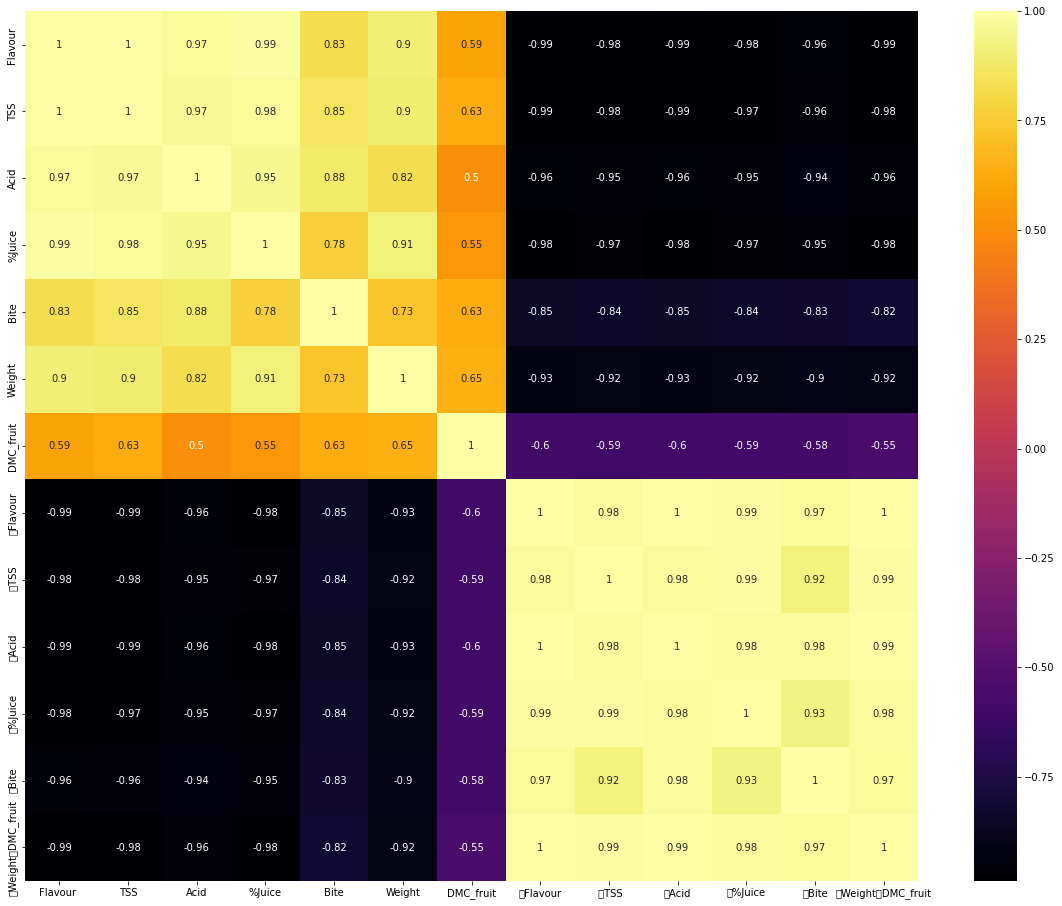

In [52]:
plt.rcParams['figure.figsize'] = [20, 16]
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True,cmap='inferno')
plt.show()

<Figure size 720x432 with 0 Axes>

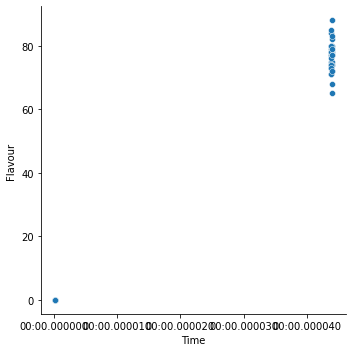

<Figure size 720x432 with 0 Axes>

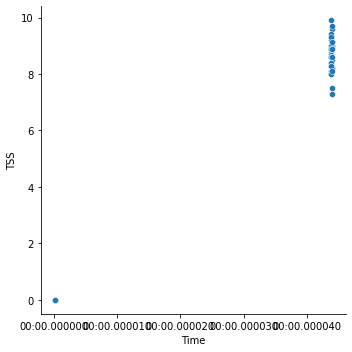

<Figure size 720x432 with 0 Axes>

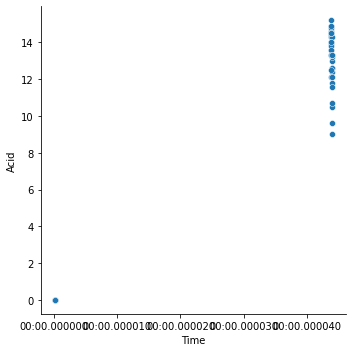

<Figure size 720x432 with 0 Axes>

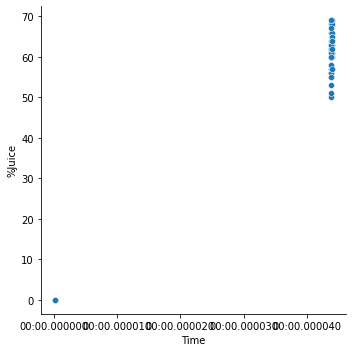

<Figure size 720x432 with 0 Axes>

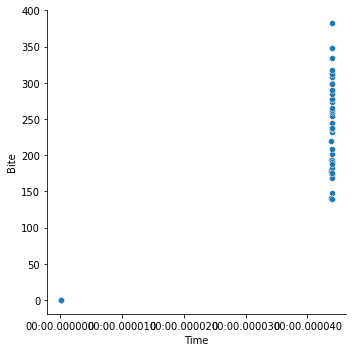

<Figure size 720x432 with 0 Axes>

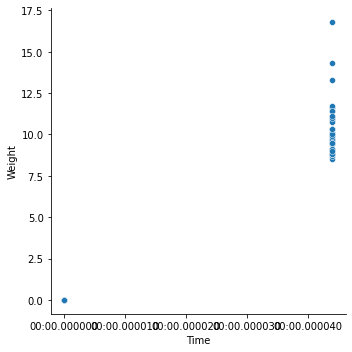

<Figure size 720x432 with 0 Axes>

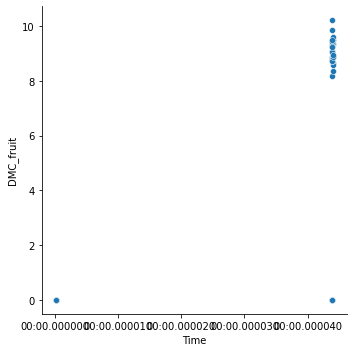

<Figure size 720x432 with 0 Axes>

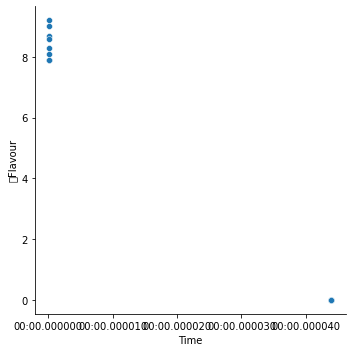

<Figure size 720x432 with 0 Axes>

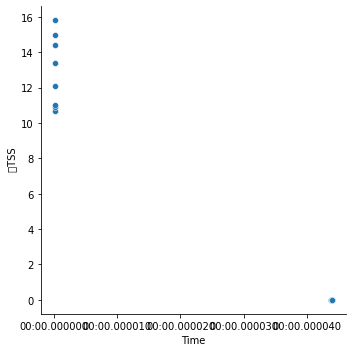

<Figure size 720x432 with 0 Axes>

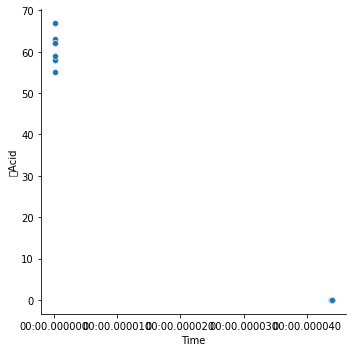

<Figure size 720x432 with 0 Axes>

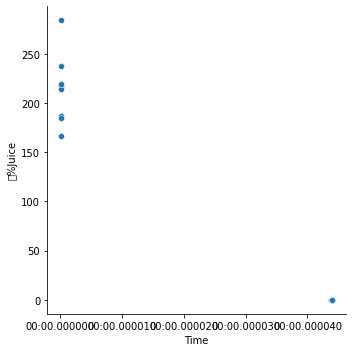

<Figure size 720x432 with 0 Axes>

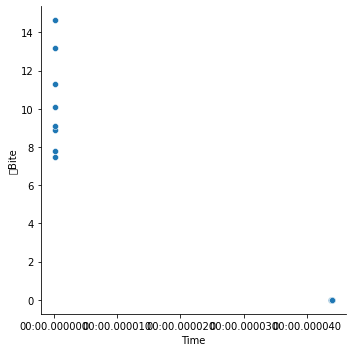

<Figure size 720x432 with 0 Axes>

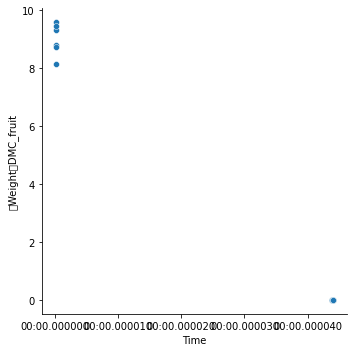

In [53]:
for i in res_tom:
    plt.figure(figsize=(10,6))
    sns.relplot(x='Time',y=i,data=tom_df)

<Figure size 720x432 with 0 Axes>

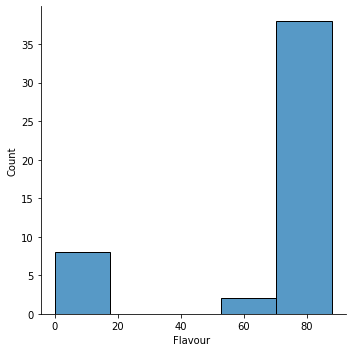

<Figure size 720x432 with 0 Axes>

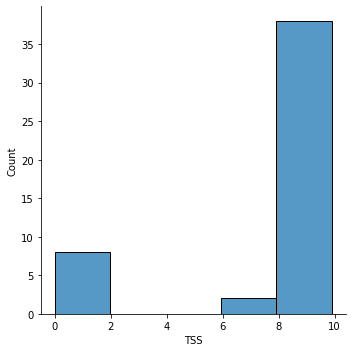

<Figure size 720x432 with 0 Axes>

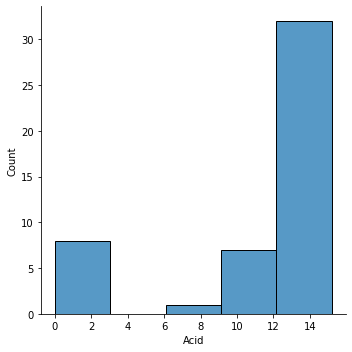

<Figure size 720x432 with 0 Axes>

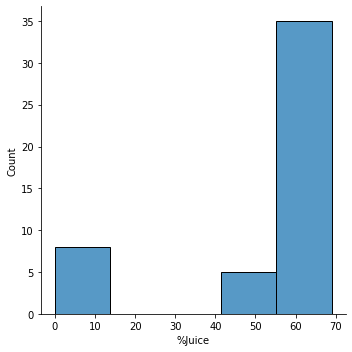

<Figure size 720x432 with 0 Axes>

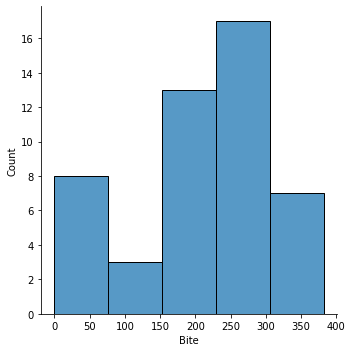

<Figure size 720x432 with 0 Axes>

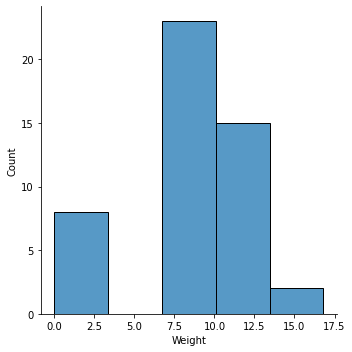

<Figure size 720x432 with 0 Axes>

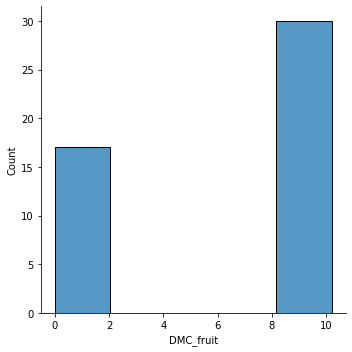

<Figure size 720x432 with 0 Axes>

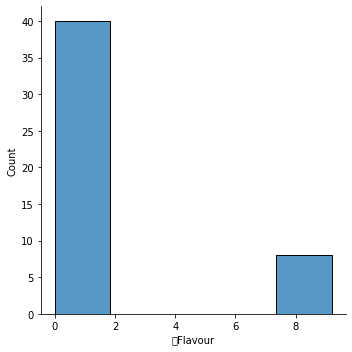

<Figure size 720x432 with 0 Axes>

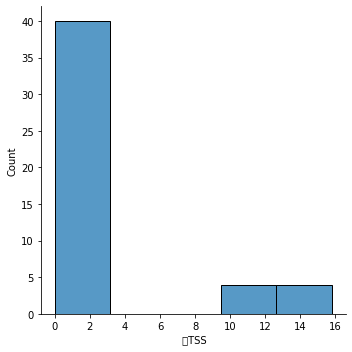

<Figure size 720x432 with 0 Axes>

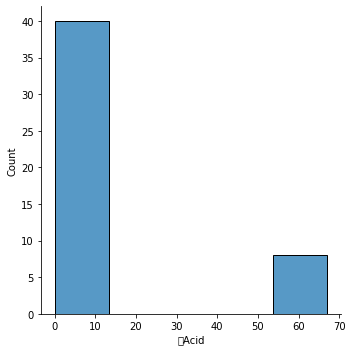

<Figure size 720x432 with 0 Axes>

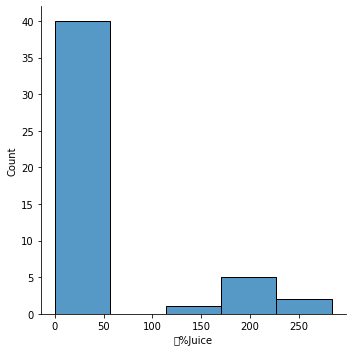

<Figure size 720x432 with 0 Axes>

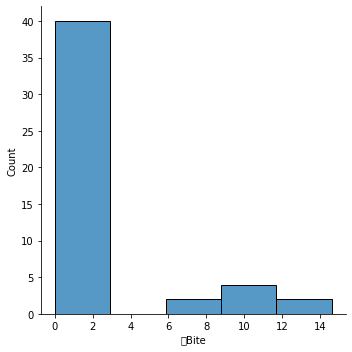

<Figure size 720x432 with 0 Axes>

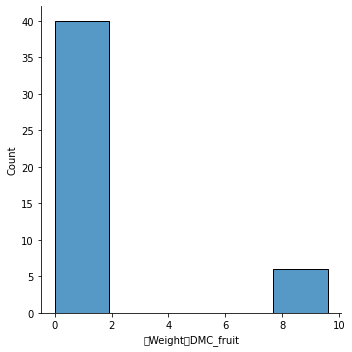

In [54]:
for i in res_tom:
    plt.figure(figsize=(10,6))
    sns.displot(tom_df[i],bins=5)